In [1]:
!unzip /content/drive/MyDrive/Datasets/gtFine_trainvaltest.zip


Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_00001

In [3]:
!unzip /content/drive/MyDrive/Datasets/leftImg8bit_trainvaltest.zip

Streaming output truncated to the last 5000 lines.
 extracting: leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000006_000019_leftImg8bit.png  


   split             city                                               file
0  train  monchengladbach  monchengladbach_000000_031005_gtFine_labelIds.png
1  train  monchengladbach  monchengladbach_000000_004580_gtFine_labelIds.png
2  train  monchengladbach  monchengladbach_000000_035718_gtFine_labelIds.png
3  train  monchengladbach  monchengladbach_000000_019142_gtFine_labelIds.png
4  train  monchengladbach  monchengladbach_000000_023489_gtFine_labelIds.png


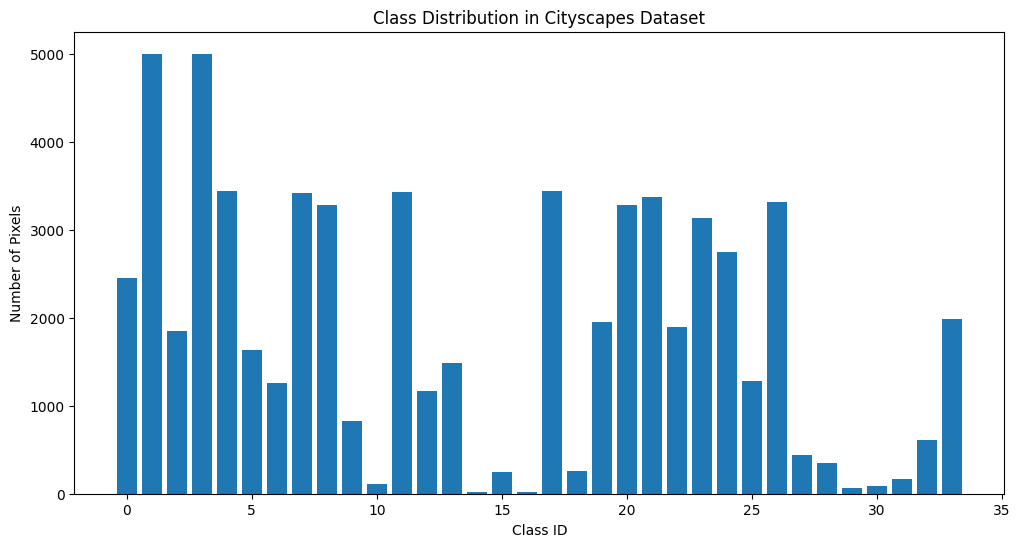

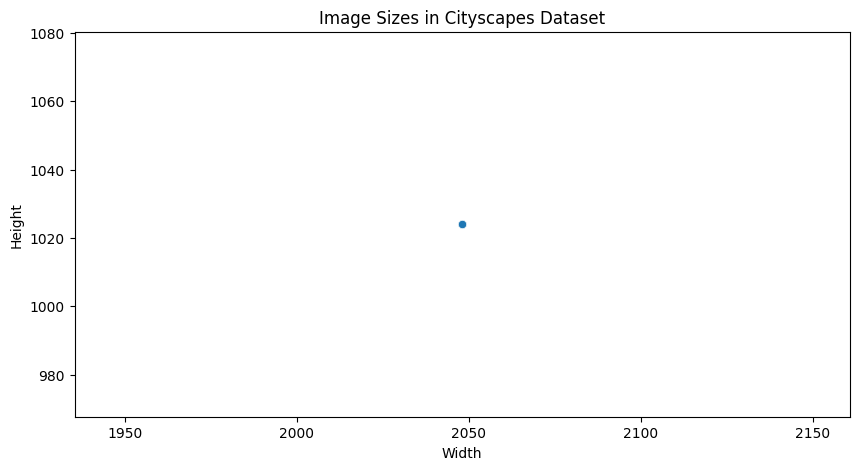

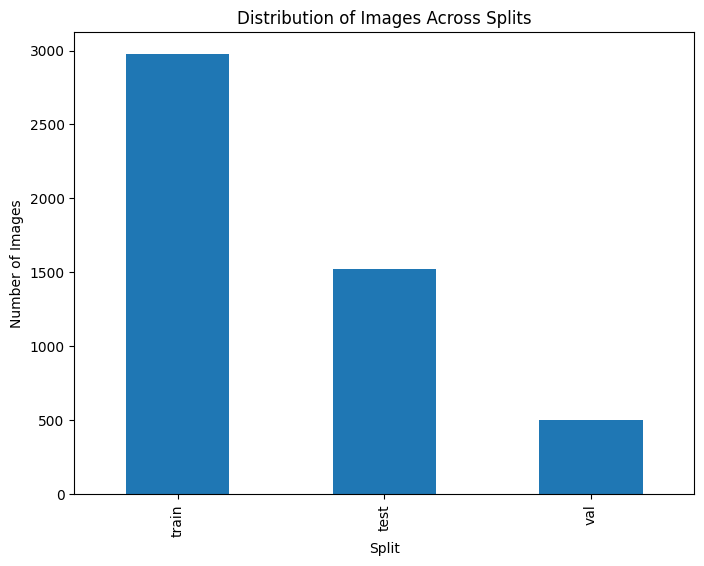

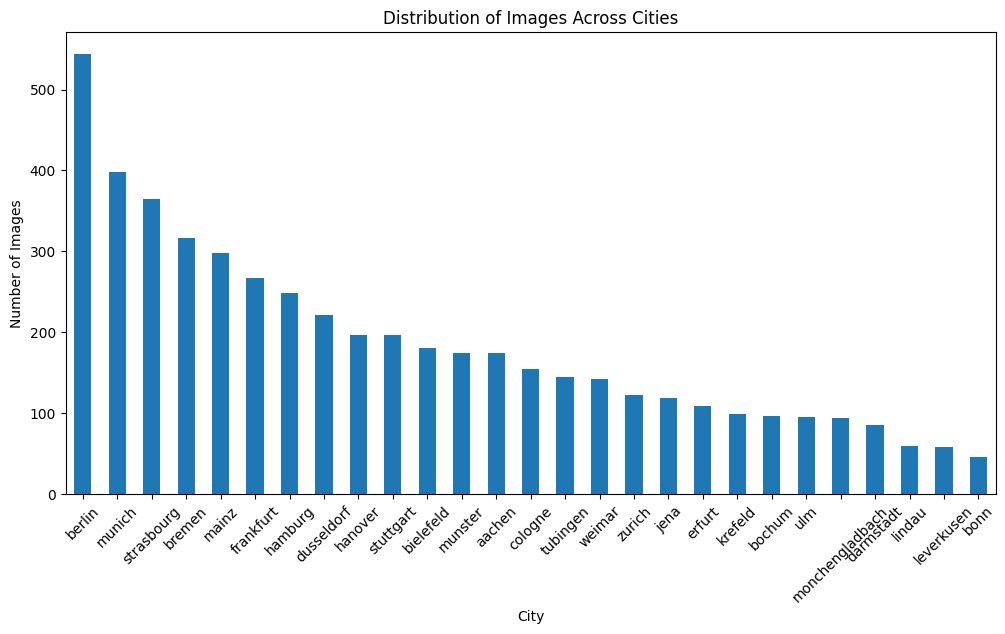

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

base_path = 'gtFine'
splits = ['train', 'val', 'test']

def load_dataset_info():
    """Load basic information about the dataset."""
    data = []
    for split in splits:
        split_path = os.path.join(base_path, split)
        cities = os.listdir(split_path)
        for city in cities:
            city_path = os.path.join(split_path, city)
            files = os.listdir(city_path)
            for file in files:
                if file.endswith('_gtFine_labelIds.png'):
                    data.append({
                        'split': split,
                        'city': city,
                        'file': file
                    })
    return pd.DataFrame(data)

def analyze_class_distribution(df):
    """Analyze the distribution of classes in the dataset."""
    class_counts = Counter()
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['split'], row['city'], row['file'])
        img = np.array(Image.open(img_path))
        class_counts.update(np.unique(img))

    classes, counts = zip(*class_counts.items())
    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts)
    plt.title('Class Distribution in Cityscapes Dataset')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Pixels')
    plt.show()

def analyze_image_sizes(df):
    """Analyze the distribution of image sizes in the dataset."""
    sizes = []
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['split'], row['city'], row['file'])
        img = Image.open(img_path)
        sizes.append(img.size)

    sizes_df = pd.DataFrame(sizes, columns=['width', 'height'])
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=sizes_df, x='width', y='height')
    plt.title('Image Sizes in Cityscapes Dataset')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

def analyze_split_distribution(df):
    """Analyze the distribution of images across different splits."""
    split_counts = df['split'].value_counts()
    plt.figure(figsize=(8, 6))
    split_counts.plot(kind='bar')
    plt.title('Distribution of Images Across Splits')
    plt.xlabel('Split')
    plt.ylabel('Number of Images')
    plt.show()

def analyze_city_distribution(df):
    """Analyze the distribution of images across different cities."""
    city_counts = df['city'].value_counts()
    plt.figure(figsize=(12, 6))
    city_counts.plot(kind='bar')
    plt.title('Distribution of Images Across Cities')
    plt.xlabel('City')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

def main():
    df = load_dataset_info()
    print(df.head())

    analyze_class_distribution(df)
    analyze_image_sizes(df)
    analyze_split_distribution(df)
    analyze_city_distribution(df)

if __name__ == "__main__":
    main()

Dataset Info:
   split             city                                               file
0  train  monchengladbach  monchengladbach_000000_031005_gtFine_labelIds.png
1  train  monchengladbach  monchengladbach_000000_004580_gtFine_labelIds.png
2  train  monchengladbach  monchengladbach_000000_035718_gtFine_labelIds.png
3  train  monchengladbach  monchengladbach_000000_019142_gtFine_labelIds.png
4  train  monchengladbach  monchengladbach_000000_023489_gtFine_labelIds.png

Total number of images: 5000


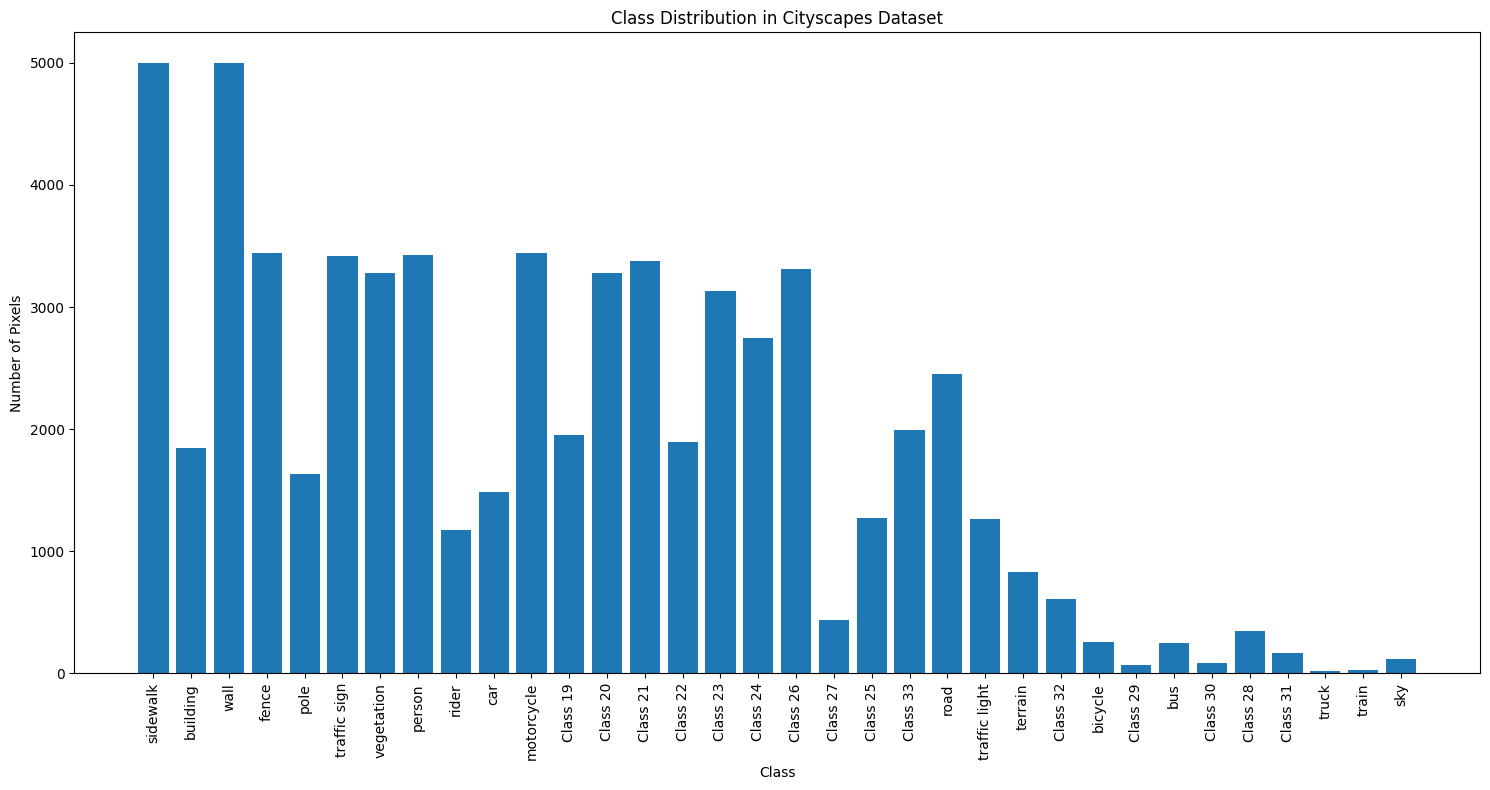

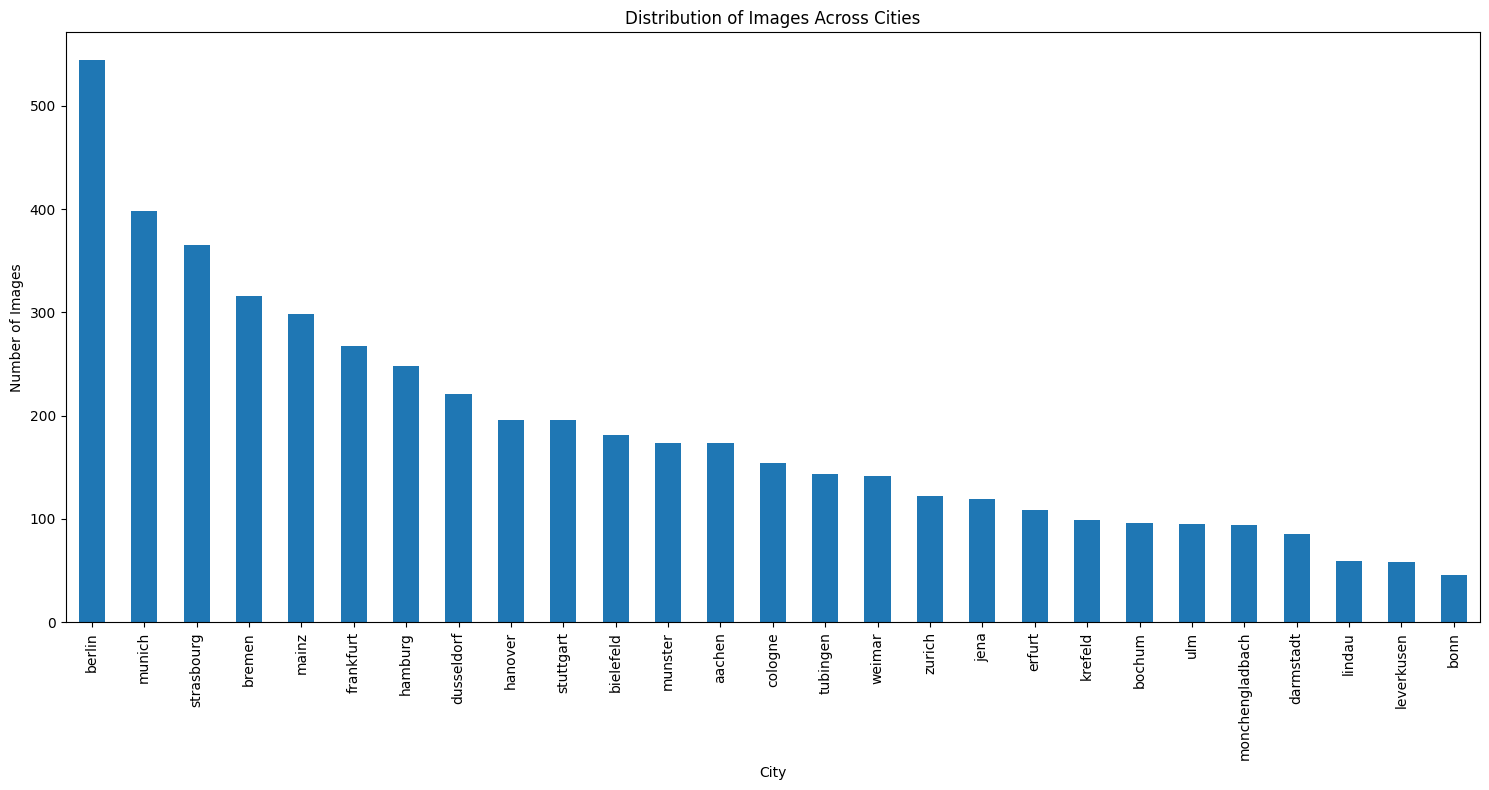

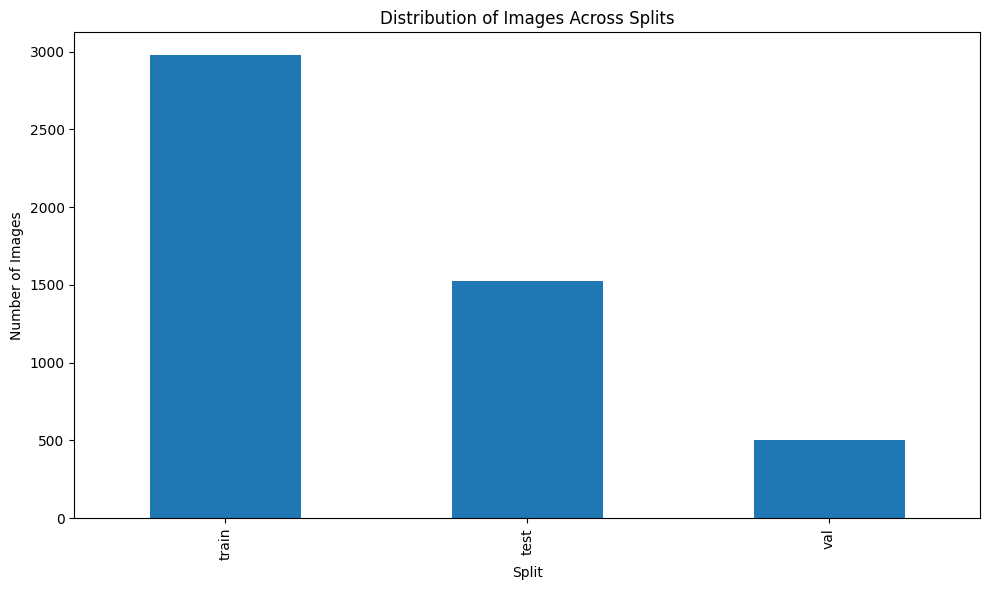

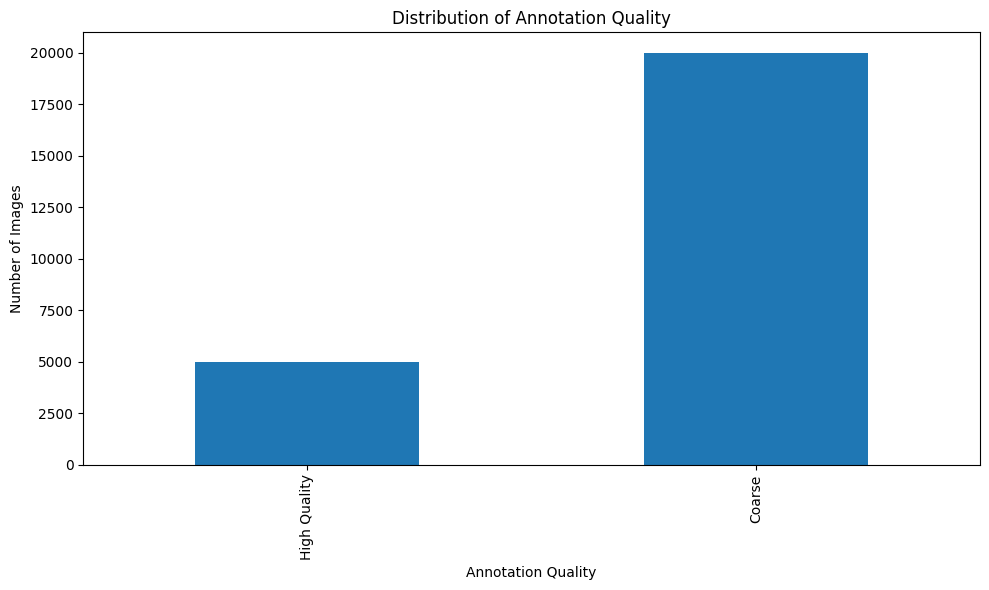

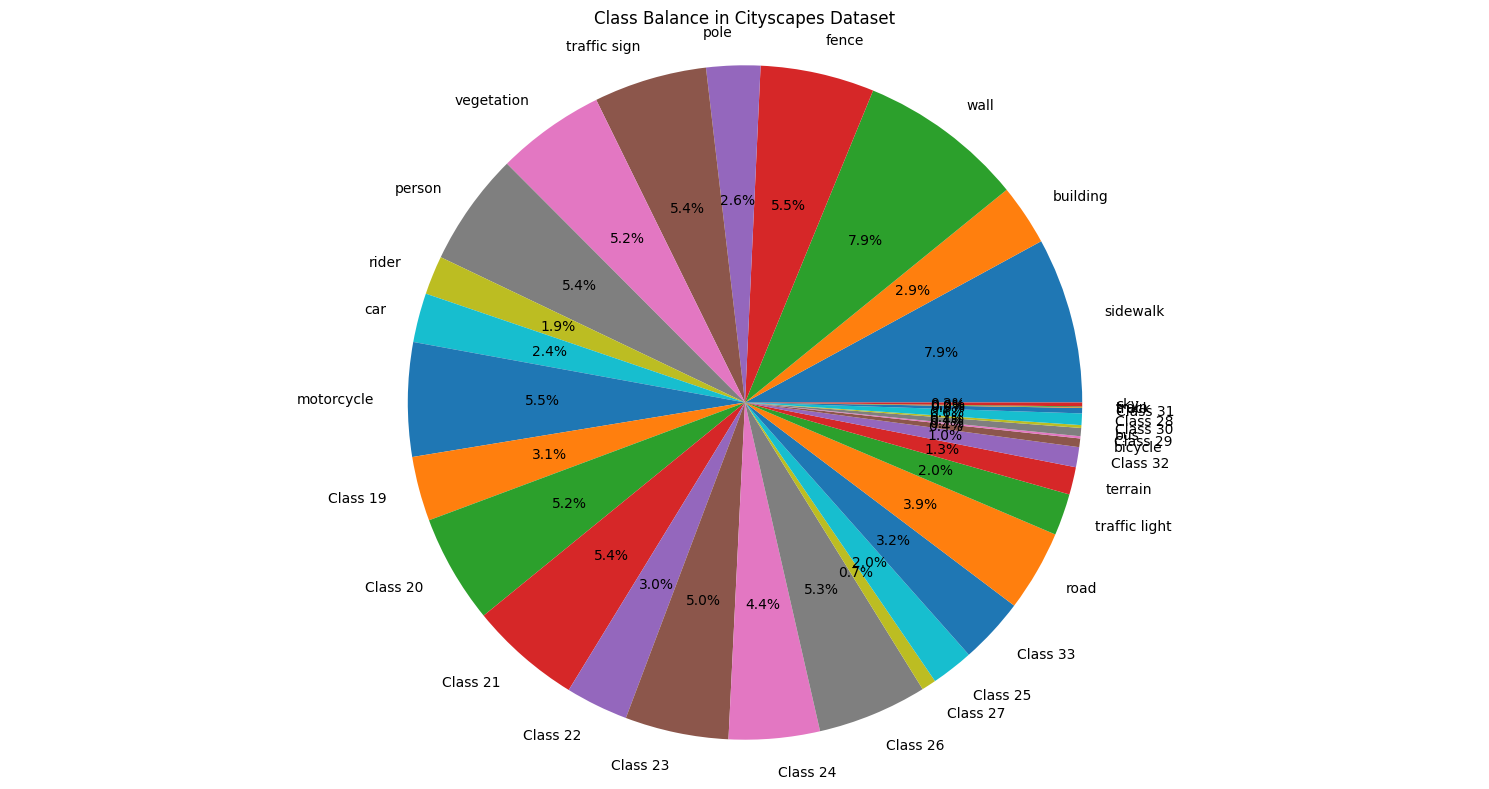

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

base_path = 'gtFine'
splits = ['train', 'val', 'test']

class_names = {
    0: 'road', 1: 'sidewalk', 2: 'building', 3: 'wall', 4: 'fence', 5: 'pole',
    6: 'traffic light', 7: 'traffic sign', 8: 'vegetation', 9: 'terrain',
    10: 'sky', 11: 'person', 12: 'rider', 13: 'car', 14: 'truck', 15: 'bus',
    16: 'train', 17: 'motorcycle', 18: 'bicycle'
}

def load_dataset_info():
    """Load basic information about the dataset."""
    data = []
    for split in splits:
        split_path = os.path.join(base_path, split)
        cities = os.listdir(split_path)
        for city in cities:
            city_path = os.path.join(split_path, city)
            files = os.listdir(city_path)
            for file in files:
                if file.endswith('_gtFine_labelIds.png'):
                    data.append({
                        'split': split,
                        'city': city,
                        'file': file
                    })
    return pd.DataFrame(data)

def analyze_class_distribution(df):
    """Analyze the distribution of classes in the dataset."""
    class_counts = Counter()
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['split'], row['city'], row['file'])
        img = np.array(Image.open(img_path))
        class_counts.update(np.unique(img))

    classes, counts = zip(*class_counts.items())
    plt.figure(figsize=(15, 8))
    plt.bar([class_names.get(c, f'Class {c}') for c in classes], counts)
    plt.title('Class Distribution in Cityscapes Dataset')
    plt.xlabel('Class')
    plt.ylabel('Number of Pixels')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def analyze_city_distribution(df):
    """Analyze the distribution of images across different cities."""
    city_counts = df['city'].value_counts()
    plt.figure(figsize=(15, 8))
    city_counts.plot(kind='bar')
    plt.title('Distribution of Images Across Cities')
    plt.xlabel('City')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def analyze_split_distribution(df):
    """Analyze the distribution of images across different splits."""
    split_counts = df['split'].value_counts()
    plt.figure(figsize=(10, 6))
    split_counts.plot(kind='bar')
    plt.title('Distribution of Images Across Splits')
    plt.xlabel('Split')
    plt.ylabel('Number of Images')
    plt.tight_layout()
    plt.show()

def analyze_annotation_quality(df):
    """Analyze the distribution of high-quality and coarse annotations."""
    quality_counts = df['split'].map({'train': 'High Quality', 'val': 'High Quality', 'test': 'High Quality'}).value_counts()
    quality_counts['Coarse'] = 20000
    plt.figure(figsize=(10, 6))
    quality_counts.plot(kind='bar')
    plt.title('Distribution of Annotation Quality')
    plt.xlabel('Annotation Quality')
    plt.ylabel('Number of Images')
    plt.tight_layout()
    plt.show()

def analyze_class_balance(df):
    """Analyze the balance of classes in the dataset."""
    class_counts = Counter()
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['split'], row['city'], row['file'])
        img = np.array(Image.open(img_path))
        class_counts.update(np.unique(img))

    total = sum(class_counts.values())
    class_percentages = {class_names.get(c, f'Class {c}'): count/total*100 for c, count in class_counts.items()}

    plt.figure(figsize=(15, 8))
    plt.pie(class_percentages.values(), labels=class_percentages.keys(), autopct='%1.1f%%')
    plt.title('Class Balance in Cityscapes Dataset')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def main():
    df = load_dataset_info()
    print("Dataset Info:")
    print(df.head())
    print("\nTotal number of images:", len(df))

    analyze_class_distribution(df)
    analyze_city_distribution(df)
    analyze_split_distribution(df)
    analyze_annotation_quality(df)
    analyze_class_balance(df)

if __name__ == "__main__":
    main()